# Baseball case study
#### Let's import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Loading the csv file to work on

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


#### Checking the shape to know whether we are dealing with a big or a small data so that we could have a rough idea on how to deal with it.

In [3]:
data.shape

(30, 17)

#### Checking if there are null values 

In [4]:
data.isna().sum().sum()

0

- Since there are no null values, no need to fill Nan.
- We are dealing with a label (W) which is a continous data.

In [5]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


There are no suspicious values. So, our data may not be skewed. We will see it later.

#### Checking the outliers

In [6]:
x = data.drop('W',axis = 1)

In [7]:
x.shape

(30, 16)

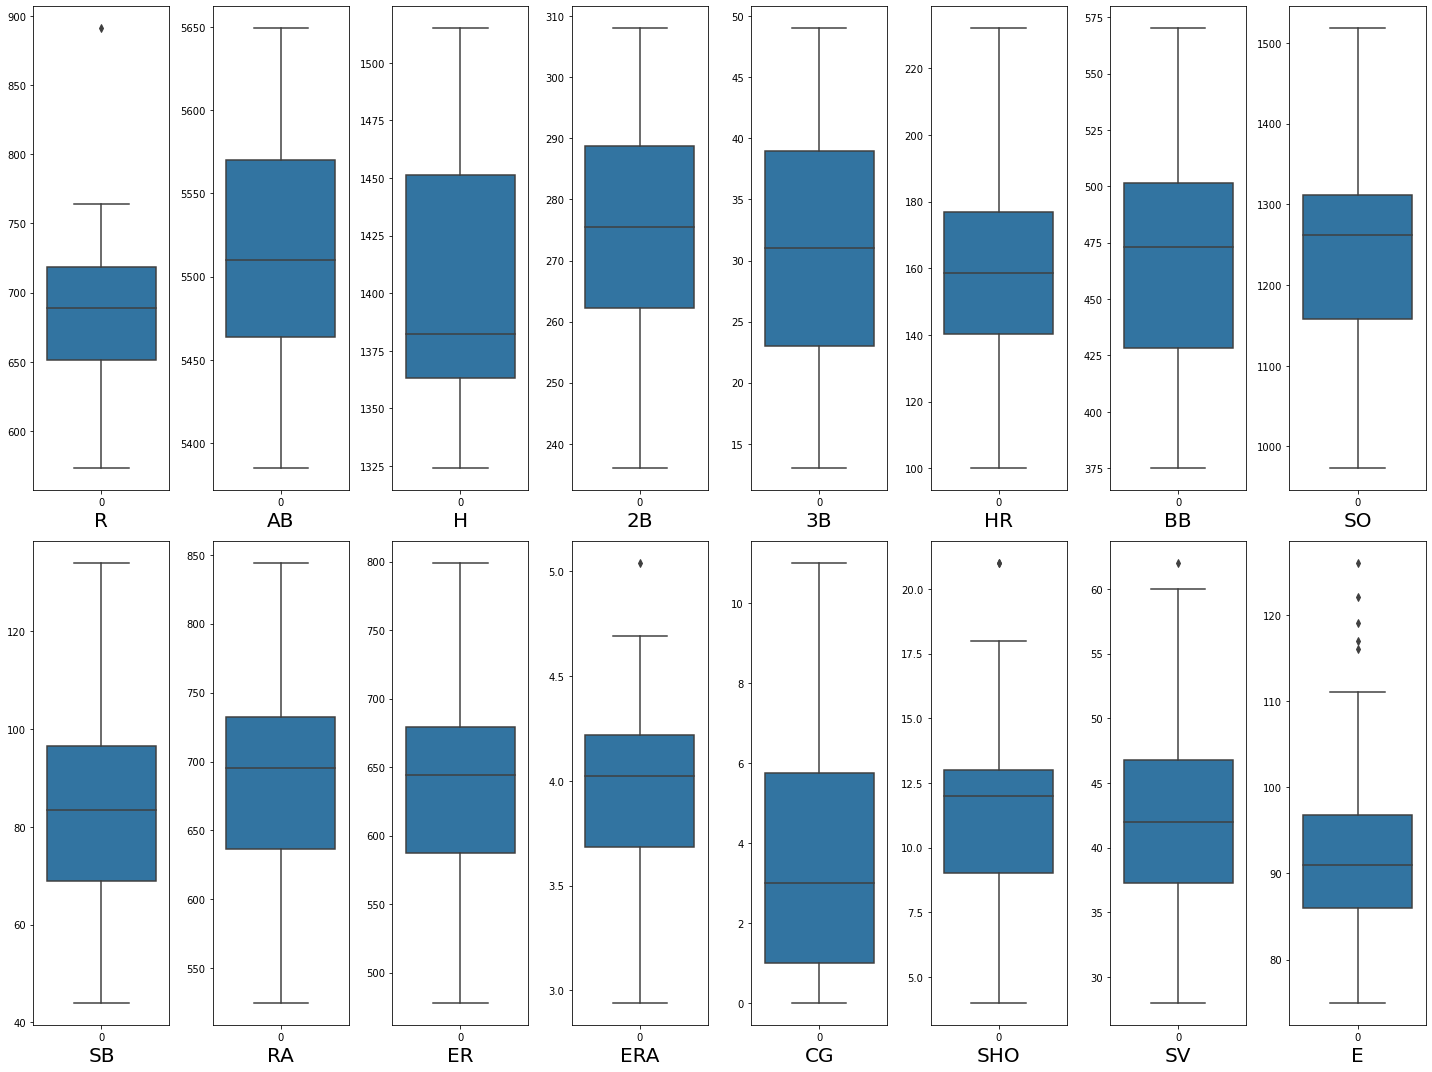

In [8]:
plt.figure(figsize = (20,15))
graph = 1

for column in x:
    if graph <=16 :
        ax = plt.subplot(2,8,graph)
        sns.boxplot(data=x[column])
        
        plt.xlabel(column,fontsize = 20)
    graph +=1
plt.tight_layout()

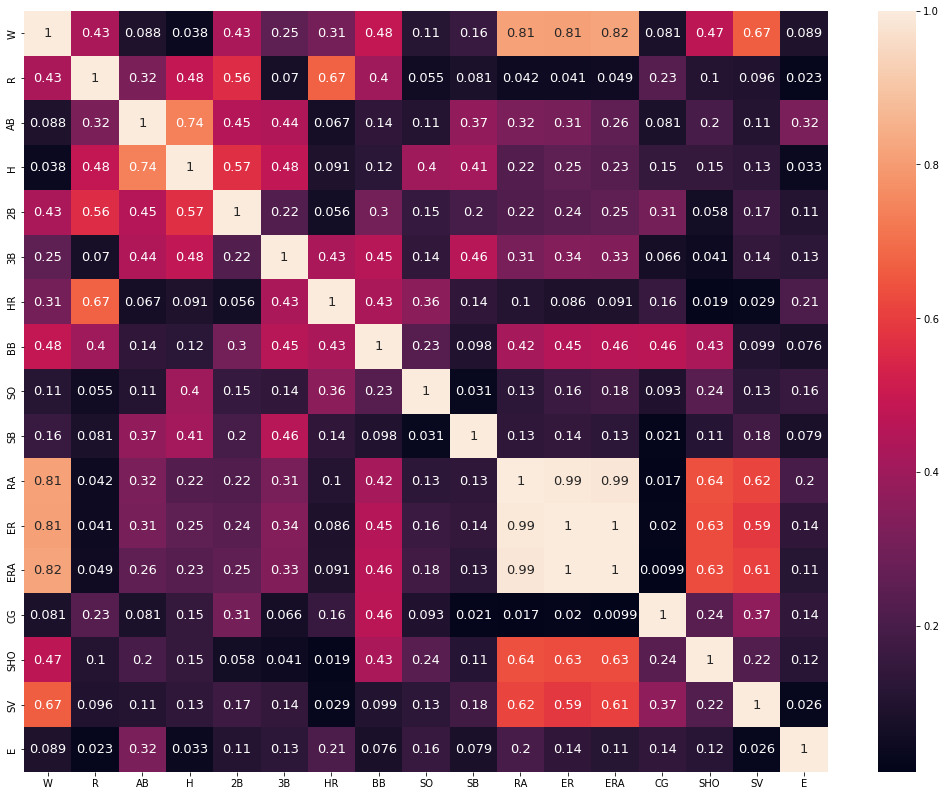

In [10]:
df_corr = data.corr().abs()
plt.figure(figsize = (18,14))
sns.heatmap(df_corr, annot = True, annot_kws = {'size':13})
plt.show()

#### Let's see how the data is distributed for each column since we need to pass a normal distribution to the model

In [16]:
data.shape

(30, 17)

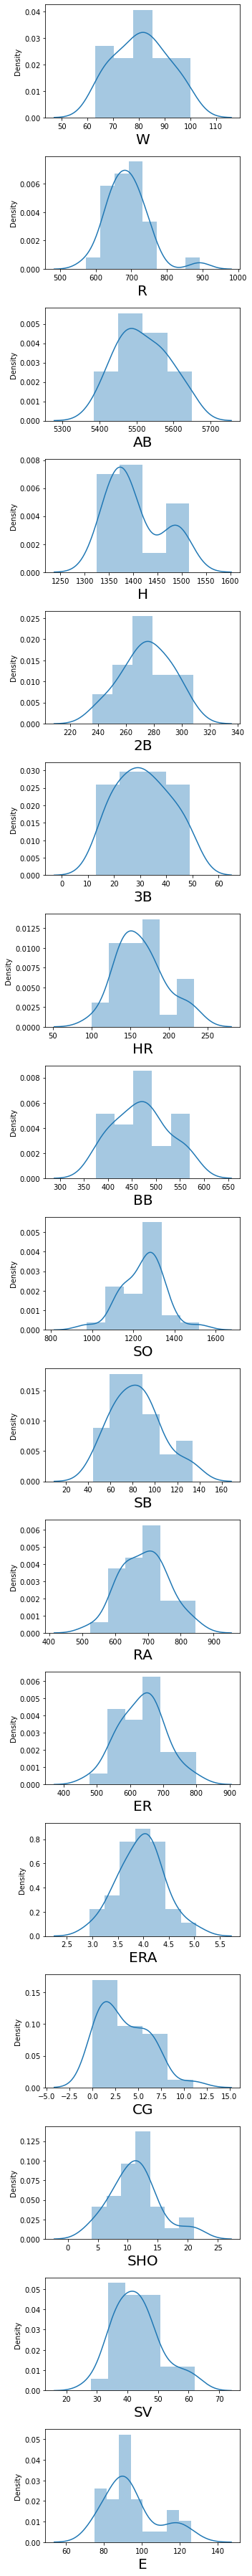

In [17]:
plt.figure(figsize = (5,50))
plotnumber = 1

for column in data:
    if plotnumber<=17:
        ax = plt.subplot(17,1,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.tight_layout()

In [18]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

**Data is pretty much clean and even skewness is negligibly small, so no need to remove skewness.**

**Let's check correlation between each feature and label.**

In [19]:
x = data.drop(columns = ['W'], axis = 1)
y = data.W

In [20]:
sns.set(font_scale = 1.6)
def plot(data,i):
    plt.figure(figsize=(8,5))
    sns.regplot(x=i,y='W',data=data)
    plt.show()

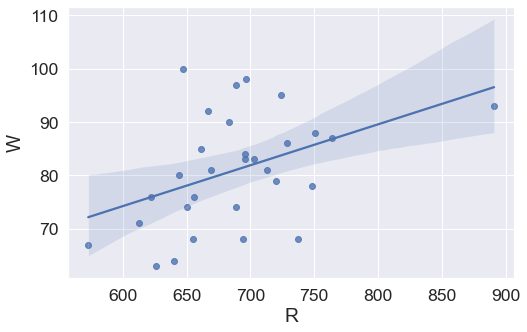

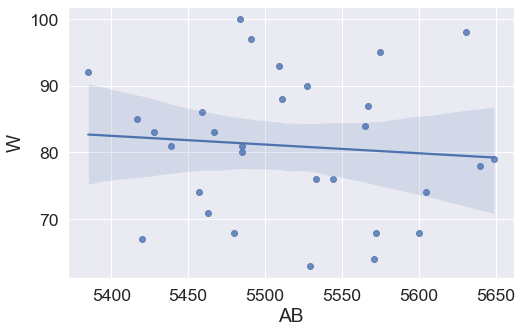

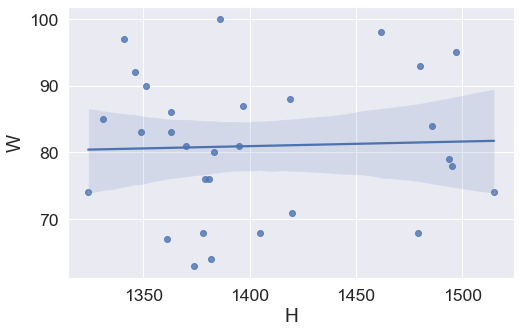

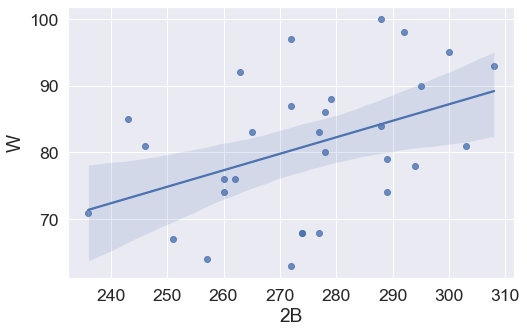

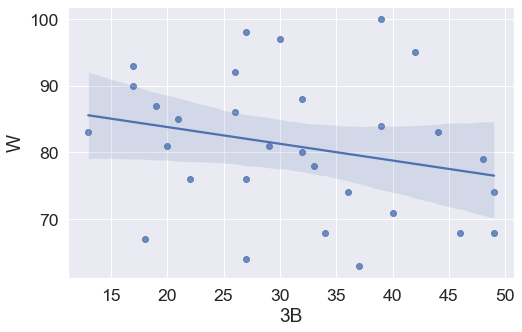

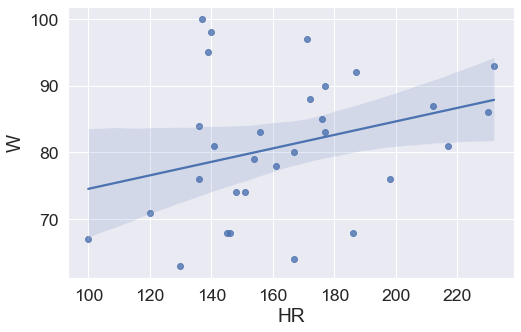

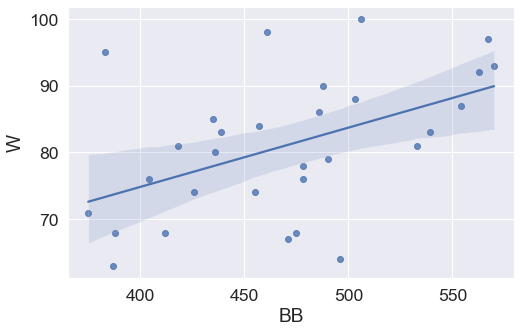

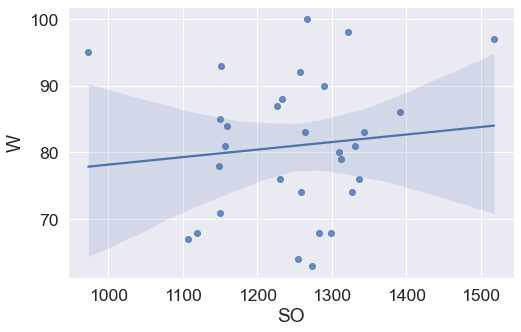

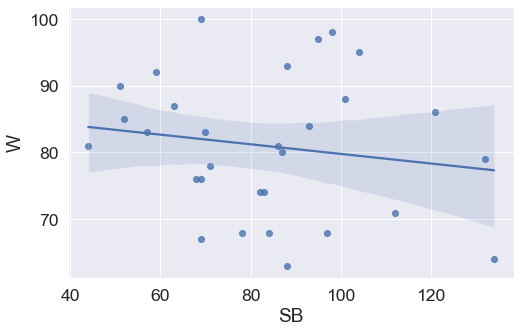

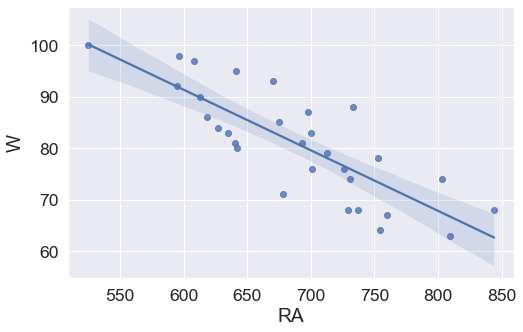

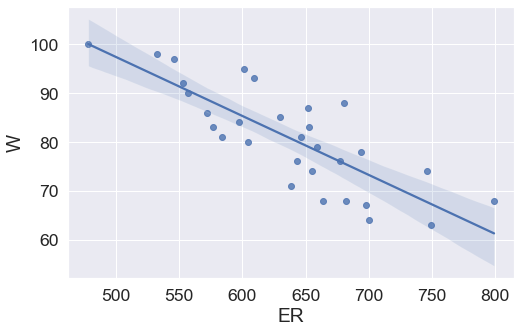

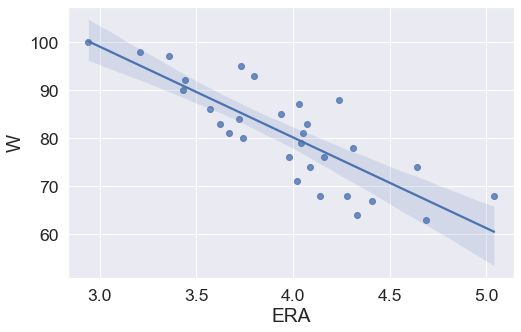

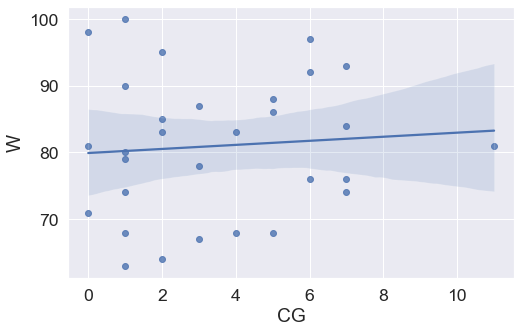

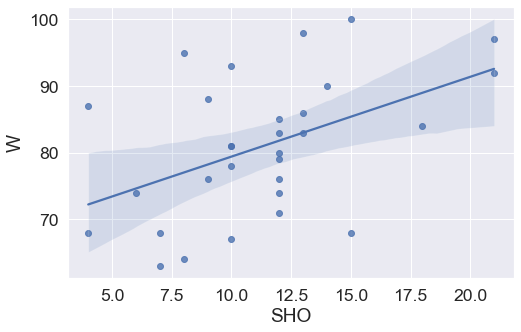

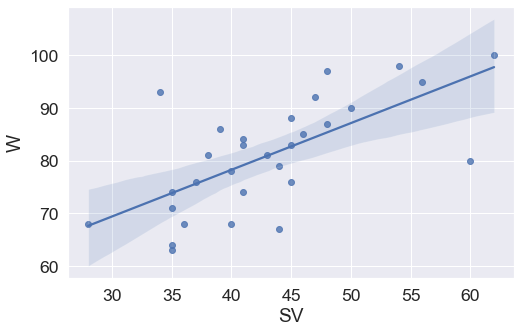

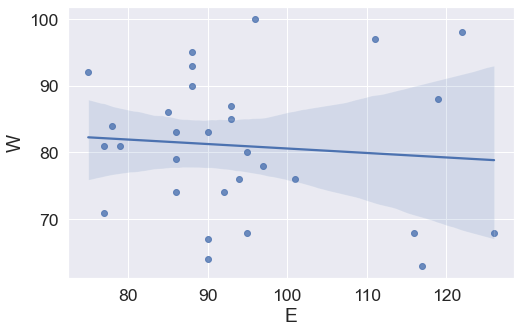

In [21]:
plot(data,'R')
plot(data,'AB')
plot(data,'H')
plot(data,'2B')
plot(data,'3B')
plot(data,'HR')
plot(data,'BB')
plot(data,'SO')
plot(data,'SB')
plot(data,'RA')
plot(data,'ER')
plot(data,'ERA')
plot(data,'CG')
plot(data,'SHO')
plot(data,'SV')
plot(data,'E')

In [22]:
# finding correlation of features with target using corrwith
corr = data.drop('W', axis = 1).corrwith(data.W)
corr

R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
dtype: float64

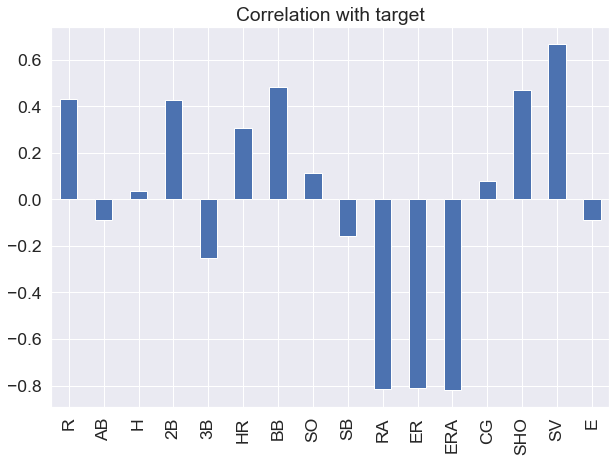

In [23]:
# Visualize the correlation
corr.plot(kind = 'bar', grid = True, figsize = (10,7),
          title = "Correlation with target")
plt.show()

### We need to remove features which has very less or no correlation with the target variable.
- AB, H, 3B, BB, SO, CG, E has very less correlation with the target.
- But to avoid overfitting, let's not remove them since we are dealing with very small data

**And also let's perform some standardization.**

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.decomposition import PCA
import sys
from sklearn import metrics
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score,r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [26]:
pca = PCA()
pca.fit_transform(x_scaled)

array([[ 8.67413218e-01,  2.12234540e+00, -2.89435845e+00,
         6.69669768e-01, -2.73124315e+00,  1.47388734e-01,
         6.35840198e-01,  3.21777425e-01, -4.62271738e-01,
        -2.01757929e-02, -7.32738349e-01,  1.45333145e-01,
         3.20716801e-01,  1.63688358e-01, -5.74522893e-02,
        -1.63687979e-02],
       [ 1.30336678e-01, -8.70951565e-01, -3.51690744e-01,
         1.34230841e-01, -2.11432776e-01,  4.68176509e-01,
        -9.04619738e-01,  9.29329504e-01, -8.52781653e-01,
        -6.25749776e-01,  6.15142497e-01,  2.10456036e-01,
         2.02008748e-01,  4.48008090e-01,  4.82353617e-02,
         3.57123178e-02],
       [-1.31144234e+00,  1.17787081e+00,  6.66544356e-01,
         2.97622601e+00,  3.12964151e-01, -6.39481127e-01,
         1.13617086e+00,  1.59649510e+00,  2.34306709e-01,
         6.53204934e-01,  3.87794603e-01,  2.84388388e-01,
        -1.04069710e-01, -1.05921351e-01,  1.73932114e-02,
        -6.92789933e-03],
       [ 7.65361610e-01, -1.37749200e

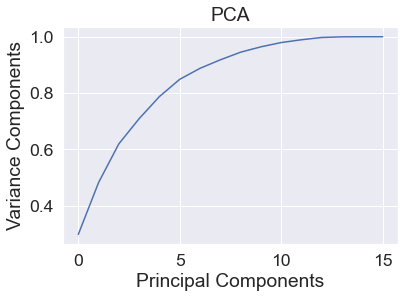

In [27]:
# Let's plot scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Components')
plt.title('PCA')
plt.show()

In [28]:
pca = PCA(n_components = 11)
new_pcomp = pca.fit_transform(x_scaled)
princi_comp = pd.DataFrame(new_pcomp, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.867413,2.122345,-2.894358,0.669670,-2.731243,0.147389,0.635840,0.321777,-0.462272,-0.020176,-0.732738
1,0.130337,-0.870952,-0.351691,0.134231,-0.211433,0.468177,-0.904620,0.929330,-0.852782,-0.625750,0.615142
2,-1.311442,1.177871,0.666544,2.976226,0.312964,-0.639481,1.136171,1.596495,0.234307,0.653205,0.387795
3,0.765362,-1.377492,-0.051721,0.950416,0.423381,-1.075740,0.063431,-0.105279,0.028011,1.593964,-0.540106
4,3.323426,1.681766,0.273832,1.260491,0.864381,0.260109,-1.708900,0.463959,0.672309,0.110339,0.065684
5,-0.923627,4.086316,3.319173,0.318585,-1.168070,-0.190317,0.960672,-0.395233,-0.801111,-0.167729,0.314109
6,-0.290468,0.738750,2.201384,-1.446595,-1.693805,-0.599754,0.338534,0.008548,0.856549,-0.427661,-0.060139
7,-0.593708,-1.961116,1.796415,-1.146524,-1.658562,1.107181,-1.327971,-0.739914,-0.320259,0.534286,0.051121
8,-1.324598,-0.735104,-1.534594,-1.140173,-0.529206,0.467598,-0.210044,0.943309,0.293857,-0.171844,-0.675044
9,2.062331,2.069248,0.209600,-0.094183,-0.944075,-0.922906,-0.794728,-0.670389,0.536733,-0.138445,0.416838


**As we have cleaned the data, and did other analysis, we are ready to train our model.**

In [29]:
#conda install -c conda-forge xgboost

In [30]:
import xgboost as xgb
from xgboost import XGBRegressor

In [31]:
# Initializing different algorithms

dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
bg = BaggingClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
lr = LinearRegression()
xgb = XGBRegressor()
svc = SVC()
svr = SVR()

In [47]:
# splitting the train and test data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = 65)

In [48]:
def print_score(algo, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = algo.predict(x_train)
        print('\n============== Train result ==============')
        print(f'Accuracy Score: {r2_score(y_train, y_pred)*100:.2f}%')
    
    elif train == False:
        pred = algo.predict(x_test)
        print('\n============== Test result ================')
        print(f'Accuracy Score: {r2_score(y_test, pred)*100:.2f}%')

In [49]:
# model training and printing train and test score
lr.fit(x_train, y_train)

print_score(lr, x_train, x_test, y_train, y_test, train = True)
print_score(lr, x_train, x_test, y_train, y_test, train = False)


============== Train result ==============
Accuracy Score: 95.01%

============== Test result ================
Accuracy Score: 83.79%


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_train_pred = lr.predict(x_train)

print("\n---- Model Evaluation for TRAIN DATA ----\n")

print("MAE is : ",mean_absolute_error(y_train,y_train_pred))

print('MSE is :',mean_squared_error(y_train,y_train_pred))

print('RMSE is :',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred = lr.predict(x_test)

print("\n\n---- Model Evaluation for TEST DATA ----\n")

print("MAE is : ",mean_absolute_error(y_test,y_test_pred))

print('MSE is :',mean_squared_error(y_test,y_test_pred))

print('RMSE is :',np.sqrt(mean_squared_error(y_test,y_test_pred)))


---- Model Evaluation for TRAIN DATA ----

MAE is :  1.6556962003951234
MSE is : 4.570510867995566
RMSE is : 2.137875316288479


---- Model Evaluation for TEST DATA ----

MAE is :  4.119848078315809
MSE is : 21.539776357121482
RMSE is : 4.6410964606568434


**RMSE value do not differ much, so our model looks good in terms of overfitting.**

## Checking model overfitting
### L1 form

In [51]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV 

In [52]:
lasscv = LassoCV(alphas = None, max_iter = 2, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=2, normalize=True)

In [53]:
alpha = lasscv.alpha_
alpha

0.1623814347794681

In [54]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.1623814347794681)

In [55]:
lasso_reg.score(x_test,y_test)

0.8345201896993972

## L2 form

In [56]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True) #arange = giving range for learning rate
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [57]:
ridgecv.alpha_

0.09099999999999998

In [58]:
ridge_model = Ridge(ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [59]:
ridge_model.score(x_test,y_test)

0.864397751322679

L1 and L2 do not differ much, so our model does not overfit

## Pipeline

In [96]:
from sklearn.pipeline import Pipeline

In [97]:
x = data.drop(columns = ['W'], axis = 1)
y = data.W

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 47)

In [99]:
pipe = Pipeline([('Scaler', StandardScaler()),
                 ('PCA',PCA(n_components = 6)),
                 ('LR',LinearRegression())])

In [100]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=6)),
                ('LR', LinearRegression())])

In [101]:
y_pred = pipe.predict(x_test)

In [102]:
print(f'Accuracy Score : {r2_score(y_test, y_pred)*100:.2f} %')

Accuracy Score : 72.89 %
